277.2942554497135
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376


/tmp/ipykernel_54328/799145727.py:38: RuntimeWarning: overflow encountered in square
  pred_y = (np.exp((-1 * (m * x + b - np.mean(x))**2) / (2 * np.std(x)**2))) / ((2 * np.pi * np.std(x)**2)**0.5)
/tmp/ipykernel_54328/799145727.py:49: RuntimeWarning: overflow encountered in square
  pred_y = (np.exp((-1 * (m * x + b - np.mean(x))**2) / (2 * np.std(x)**2))) / ((2 * np.pi * np.std(x)**2)**0.5)


874.9823353439376
874.9823353439376
874.9823353439376
874.9823353439376
nan


/tmp/ipykernel_54328/799145727.py:53: RuntimeWarning: overflow encountered in multiply
  md = np.sum((y - pred_y) * (-x * (m * x + b - np.mean(x))) / (np.std(x)**2))
/home/code_wizard/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
m nan, b nan, loss nan


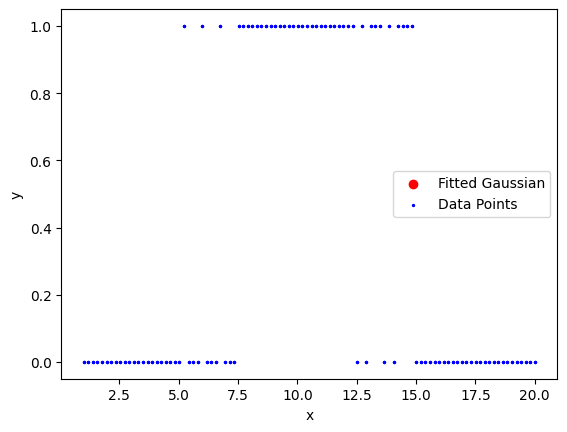

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

# Generate data
x = np.linspace(1, 20, 100)
np.random.seed(42)
y = []

for i in x:
    if i < 5:
        y.append(0)
    elif 5 < i < 7.5:
        lab = np.random.randint(2)
        y.append(lab)
    elif 7.5 < i < 12.5:
        y.append(1)
    elif 12.5 < i < 15:
        lab = np.random.randint(2)
        y.append(lab)
    else:
        y.append(0)

y = np.array(y)

# Scatter plot
plt.scatter(x, y, c="blue", s=2)
plt.xlabel("x")
plt.ylabel("y")

# Initialize m and b for NLL
m = 0
b = 0

# Negative log-likelihood function
def gaussian_nll(m, b):
    # Calculate predicted probabilities
    pred_y = (np.exp((-1 * (m * x + b - np.mean(x))**2) / (2 * np.std(x)**2))) / ((2 * np.pi * np.std(x)**2)**0.5)
    # Ensure pred_y does not get too small for log
    pred_y = np.clip(pred_y, 1e-10, None)
    loss = -np.sum(y * np.log(pred_y) + (1 - y) * np.log(1 - pred_y))  # Binary cross-entropy-like loss
    return loss

# Gradient descent for NLL
iterations = 10000
learning_rate = 0.0045

for i in range(iterations):
    pred_y = (np.exp((-1 * (m * x + b - np.mean(x))**2) / (2 * np.std(x)**2))) / ((2 * np.pi * np.std(x)**2)**0.5)
    pred_y = np.clip(pred_y, 1e-10, None)
    
    # Compute gradients
    md = np.sum((y - pred_y) * (-x * (m * x + b - np.mean(x))) / (np.std(x)**2))
    bd = np.sum((y - pred_y) * (-1 * (m * x + b - np.mean(x))) / (np.std(x)**2))

    b -= learning_rate * bd
    m -= learning_rate * md
    loss = gaussian_nll(m, b)

    if i % 100 == 0:  # Print loss every 100 iterations
        print(loss)

print(f'm {m}, b {b}, loss {loss}')

# Calculate final predicted probabilities
final_pred_y = (np.exp((-1 * (m * x + b - np.mean(x))**2) / (2 * np.std(x)**2))) / ((2 * np.pi * np.std(x)**2)**0.5)
final_pred_y = np.clip(final_pred_y, 1e-10, None)

# Final plot
plt.scatter(x, final_pred_y, color='red', label='Fitted Gaussian')
plt.scatter(x, y, c="blue", s=2, label='Data Points')
plt.legend()
plt.show()
